In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('ElectricCarData_Norm.csv')
data.head()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997


# EDA

In [3]:
# shape of the data 
data.shape

(103, 14)

Data cotains 103 entries 

In [4]:
list(data.columns)

['Brand',
 'Model',
 'Accel',
 'TopSpeed',
 'Range',
 'Efficiency',
 'FastCharge',
 'RapidCharge',
 'PowerTrain',
 'PlugType',
 'BodyStyle',
 'Segment',
 'Seats',
 'PriceEuro']

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Brand        103 non-null    object
 1   Model        103 non-null    object
 2   Accel        103 non-null    object
 3   TopSpeed     103 non-null    object
 4   Range        103 non-null    object
 5   Efficiency   103 non-null    object
 6   FastCharge   103 non-null    object
 7   RapidCharge  103 non-null    object
 8   PowerTrain   103 non-null    object
 9   PlugType     103 non-null    object
 10  BodyStyle    103 non-null    object
 11  Segment      103 non-null    object
 12  Seats        103 non-null    int64 
 13  PriceEuro    103 non-null    int64 
dtypes: int64(2), object(12)
memory usage: 11.4+ KB


In [6]:
data.isnull().sum()

Brand          0
Model          0
Accel          0
TopSpeed       0
Range          0
Efficiency     0
FastCharge     0
RapidCharge    0
PowerTrain     0
PlugType       0
BodyStyle      0
Segment        0
Seats          0
PriceEuro      0
dtype: int64

In [7]:
data.duplicated().sum()

0

* There are no null values and duplicates in the data

In [8]:
data.describe()

,Seats,PriceEuro
count,103.000000,103.000000
mean,4.883495,55811.563107
std,0.795834,34134.665280
min,2.000000,20129.000000
25%,5.000000,34429.500000
50%,5.000000,45000.000000
75%,5.000000,65000.000000
max,7.000000,215000.000000


In [9]:
brands = len(data['Brand'].unique())
print(f"Number of unique brands: {brands}")

Number of unique brands: 33


Data contains 33 unique brands 

In [10]:
data['Segment'].unique()

array(['D', 'C', 'B', 'F', 'A', 'E', 'N', 'S'], dtype=object)

#### Distribution of Segments

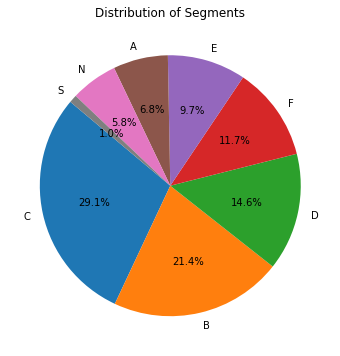

In [11]:
segment_counts = data['Segment'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Segments')
plt.show()


### Distribution of Brands

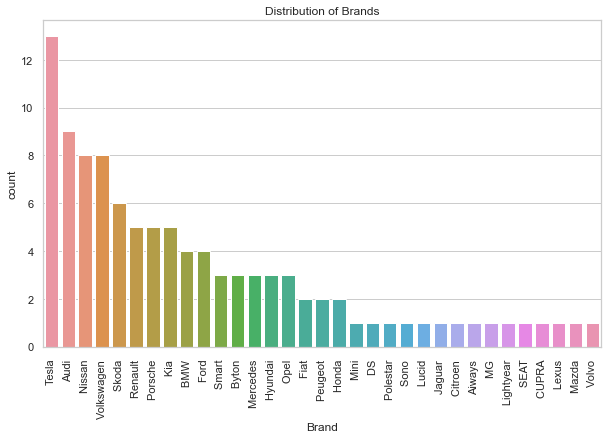

In [12]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Brand', order=data['Brand'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Brands')
plt.show()


* observation : from the above graph it is seen that "Tesla" is most popular brand which is then followed by Audi, Nissan,Volkswagon and Skoda and so on.

### Top Five Brands by Average Price

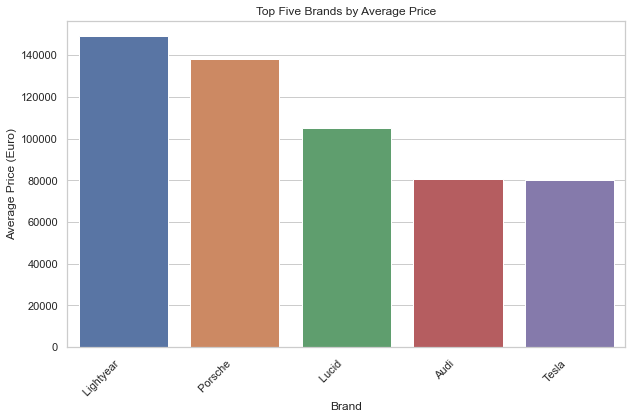

In [13]:
top_five_brands_by_price = data.groupby('Brand')['PriceEuro'].mean().sort_values(ascending=False).index[:5]
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=data[data['Brand'].isin(top_five_brands_by_price)], x='Brand', y='PriceEuro', order=top_five_brands_by_price, ci=None)
plt.xticks(rotation=45, ha='right')
plt.title('Top Five Brands by Average Price')
plt.xlabel('Brand')
plt.ylabel('Average Price (Euro)')
plt.show()

 According to above charts Tesla,Audi,Nissan,Volkswagen,Skoda are the top 5 brands by price 

### Distribution of acceleration and top speed

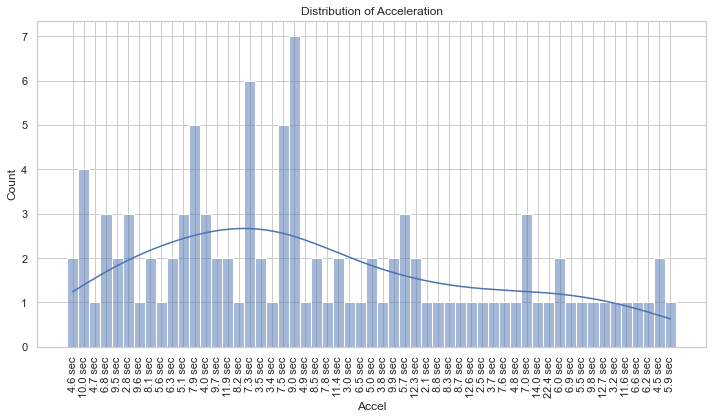

In [14]:
# Analyze the distribution of acceleration and top speed
plt.figure(figsize = (12,6))
sns.histplot(data=data, x='Accel', bins=20, kde=True)
plt.title('Distribution of Acceleration')
plt.xticks(rotation= 90)
plt.show()


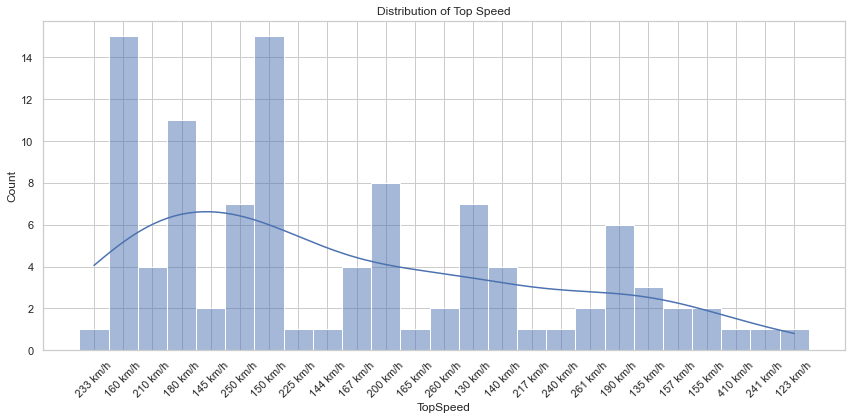

In [15]:
plt.figure(figsize = (12,6))
sns.histplot(data=data, x='TopSpeed', bins=20, kde=True)
plt.title('Distribution of Top Speed')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

### Distribution of Power Train

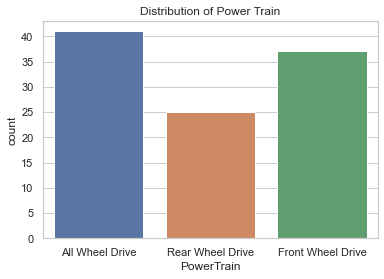

In [16]:
sns.countplot(data=data, x='PowerTrain')
plt.title('Distribution of Power Train')
plt.show()

### Distribution of Plug Type

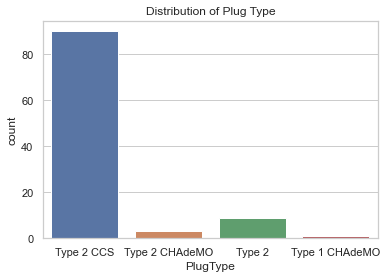

In [17]:
sns.countplot(data=data, x='PlugType')
plt.title('Distribution of Plug Type')
plt.show()

* the most popular plug type is Type 2 CCS

### Distribution of Rapid Charging Capability

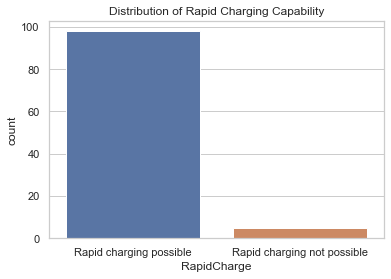

In [18]:
# Analyze the distribution of rapid charging capability
sns.countplot(data=data, x='RapidCharge')
plt.title('Distribution of Rapid Charging Capability')
plt.show()


* here we can see that the rapid charging is possible in most of the cases 

### Distribution of Prices

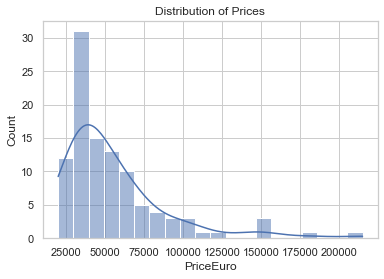

In [19]:
# Analyze the distribution of prices
sns.histplot(data=data, x='PriceEuro', bins=20, kde=True)
plt.title('Distribution of Prices')
plt.show()


* mostly the price range is varing from 25000 to 125000 where the graph showing the peak at around 30000 to 40000 PriceEuros

### distribution of body types

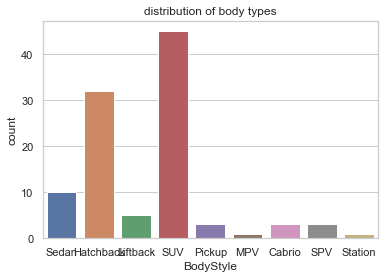

In [20]:
# Analyze the distribution of body types
sns.countplot(data=data, x='BodyStyle')
plt.title('distribution of body types')
plt.show()

* SUV cars is most in terms of body type

### Distribution of Seats

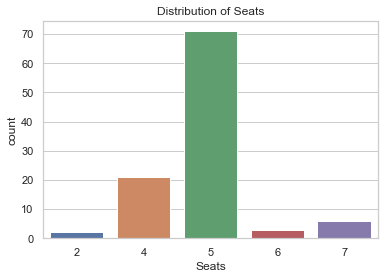

In [21]:
# Analyze the distribution of the number of seats
sns.countplot(data=data, x='Seats')
plt.title('Distribution of Seats')
plt.show()

* Here we can see that the there 5 siter cars are more

In [22]:
data.columns 

Index(['Brand', 'Model', 'Accel', 'TopSpeed', 'Range', 'Efficiency',
       'FastCharge', 'RapidCharge', 'PowerTrain', 'PlugType', 'BodyStyle',
       'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

In [23]:
# Convert 'Efficiency',Accel,TopSpeed,Range,FastCharge to string
# and then extract numeric part and convert to float
data['Efficiency'] = data['Efficiency'].astype(str).str.extract('(\d+)').astype(float)
data['Accel'] = data['Accel'].astype(str).str.extract('(\d+)').astype(float)
data['TopSpeed'] = data['TopSpeed'].astype(str).str.extract('(\d+)').astype(float)
data['Range'] = data['Range'].astype(str).str.extract('(\d+)').astype(float)
data['FastCharge'] = data['FastCharge'].astype(str).str.extract('(\d+)').astype(float)

print(data['Efficiency'])

0      161.0
1      167.0
2      181.0
3      206.0
4      168.0
       ...  
98     191.0
99     258.0
100    194.0
101    232.0
102    238.0
Name: Efficiency, Length: 103, dtype: float64


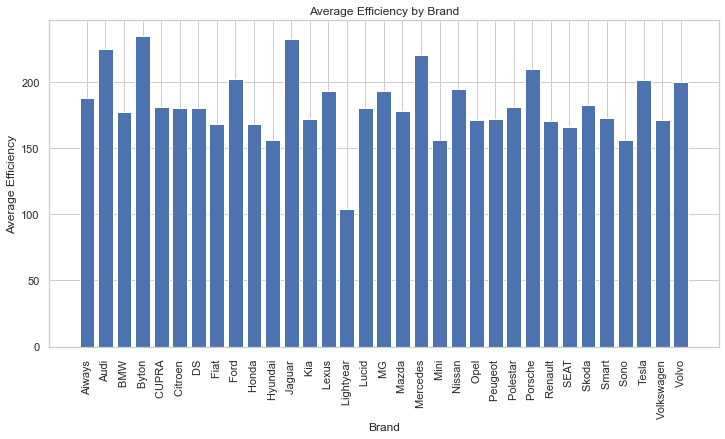

In [24]:
# Group by 'Brand' and calculate the mean of 'Efficiency'
avg_efficiency = data.groupby('Brand')['Efficiency'].mean().reset_index()
plt.figure(figsize = (12,6))
plt.bar(avg_efficiency['Brand'], avg_efficiency['Efficiency'])
plt.xlabel('Brand')
plt.ylabel('Average Efficiency')
plt.title('Average Efficiency by Brand')
plt.xticks(rotation = 90)
plt.show()


In [25]:
data.dtypes


Brand           object
Model           object
Accel          float64
TopSpeed       float64
Range          float64
Efficiency     float64
FastCharge     float64
RapidCharge     object
PowerTrain      object
PlugType        object
BodyStyle       object
Segment         object
Seats            int64
PriceEuro        int64
dtype: object

In [26]:
data

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.0,233.0,450.0,161.0,940.0,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160.0,270.0,167.0,250.0,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.0,210.0,400.0,181.0,620.0,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.0,180.0,360.0,206.0,560.0,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.0,145.0,170.0,168.0,190.0,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.0,160.0,330.0,191.0,440.0,Rapid charging possible,Front Wheel Drive,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.0,210.0,335.0,258.0,540.0,Rapid charging possible,All Wheel Drive,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.0,200.0,325.0,194.0,440.0,Rapid charging possible,All Wheel Drive,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.0,200.0,375.0,232.0,450.0,Rapid charging possible,All Wheel Drive,Type 2 CCS,Hatchback,C,5,65000


In [27]:
#copy of original data
df1 = data.copy()

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
# converting the categorical variables to numerical format
label_encoder = LabelEncoder()

In [30]:
# Apply label encoding to selected columns
categorical_columns = ['RapidCharge','PowerTrain', 'PlugType', 'BodyStyle', 'Segment']
for column in categorical_columns:
    df1[column] = label_encoder.fit_transform(df1[column])


In [31]:
df1.head()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.0,233.0,450.0,161.0,940.0,1,0,2,7,3,5,55480
1,Volkswagen,ID.3 Pure,10.0,160.0,270.0,167.0,250.0,1,2,2,1,2,5,30000
2,Polestar,2,4.0,210.0,400.0,181.0,620.0,1,0,2,2,3,5,56440
3,BMW,iX3,6.0,180.0,360.0,206.0,560.0,1,2,2,6,3,5,68040
4,Honda,e,9.0,145.0,170.0,168.0,190.0,1,2,2,1,1,4,32997


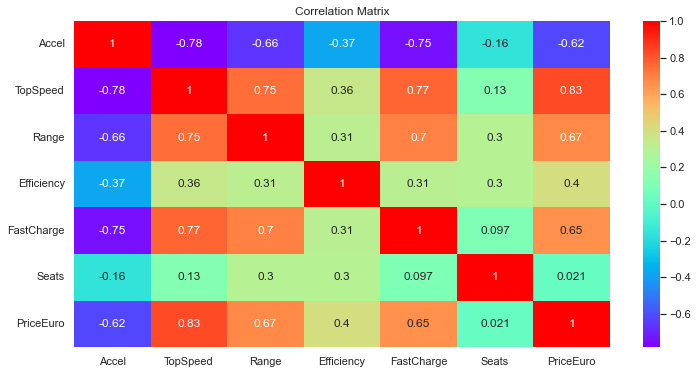

In [32]:
# Correlation matrix
plt.figure(figsize = (12,6))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='rainbow')
plt.title('Correlation Matrix')
plt.show()

In [33]:
#  Select Features for Market Segmentation
selected_features = ['Accel', 'TopSpeed', 'Range', 'Efficiency', 'FastCharge', 'RapidCharge', 'PowerTrain', 'PlugType', 'BodyStyle', 'Seats', 'PriceEuro']

In [34]:
#  Extract selected features from the original DataFrame
segmentation_data = df1[selected_features]

In [35]:
segmentation_data

,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Seats,PriceEuro
0,4.0,233.0,450.0,161.0,940.0,1,0,2,7,5,55480
1,10.0,160.0,270.0,167.0,250.0,1,2,2,1,5,30000
2,4.0,210.0,400.0,181.0,620.0,1,0,2,2,5,56440
3,6.0,180.0,360.0,206.0,560.0,1,2,2,6,5,68040
4,9.0,145.0,170.0,168.0,190.0,1,2,2,1,4,32997
...,...,...,...,...,...,...,...,...,...,...,...
98,7.0,160.0,330.0,191.0,440.0,1,1,2,1,5,45000
99,4.0,210.0,335.0,258.0,540.0,1,0,2,6,5,96050
100,5.0,200.0,325.0,194.0,440.0,1,0,2,1,5,50000
101,5.0,200.0,375.0,232.0,450.0,1,0,2,1,5,65000


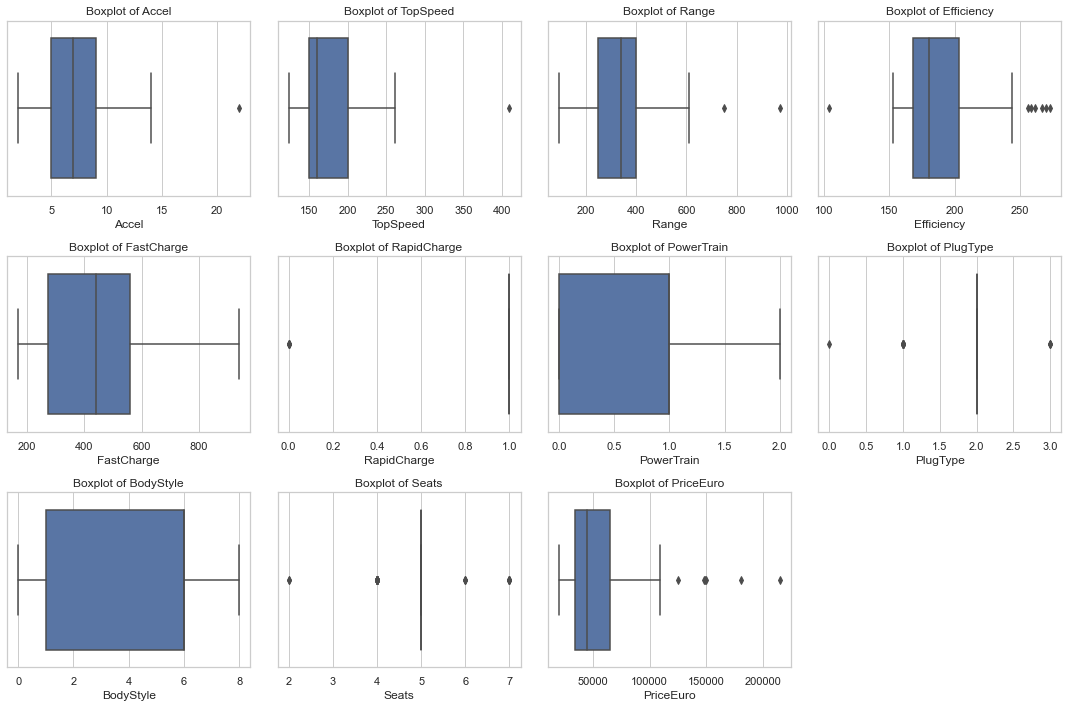

In [36]:
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")
# Loop through each feature and create a boxplot
for i, feature in enumerate(selected_features):
    plt.subplot(3, 4, i + 1) 
    sns.boxplot(x=segmentation_data[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()


In [37]:
#Removig outliers 
#Accel
Q1 = segmentation_data.Accel.quantile(0.25)
Q3 = segmentation_data.Accel.quantile(0.75)
IQR = Q3 - Q1
segmentation_data = segmentation_data[(segmentation_data.Accel >= Q1 - 1.5*IQR) & (segmentation_data.Accel <= Q3 + 1.5*IQR)]

#TopSpeed
Q1 = segmentation_data.TopSpeed.quantile(0.25)
Q3 = segmentation_data.TopSpeed.quantile(0.75)
IQR = Q3 - Q1
segmentation_data = segmentation_data[(segmentation_data.TopSpeed >= Q1 - 1.5*IQR) & (segmentation_data.TopSpeed <= Q3 + 1.5*IQR)]

#Range
Q1 = segmentation_data.Range.quantile(0.25)
Q3 = segmentation_data.Range.quantile(0.75)
IQR = Q3 - Q1
segmentation_data = segmentation_data[(segmentation_data.Range >= Q1 - 1.5*IQR) & (segmentation_data.Range <= Q3 + 1.5*IQR)]

#Efficiency
Q1 = segmentation_data.Efficiency.quantile(0.25)
Q3 = segmentation_data.Efficiency.quantile(0.75)
IQR = Q3 - Q1
segmentation_data = segmentation_data[(segmentation_data.Efficiency >= Q1 - 1.5*IQR) & (segmentation_data.Efficiency <= Q3 + 1.5*IQR)]

#PriceEuro
Q1 = segmentation_data.PriceEuro.quantile(0.25)
Q3 = segmentation_data.PriceEuro.quantile(0.75)
IQR = Q3 - Q1
segmentation_data = segmentation_data[(segmentation_data.PriceEuro >= Q1 - 1.5*IQR) & (segmentation_data.PriceEuro <= Q3 + 1.5*IQR)]


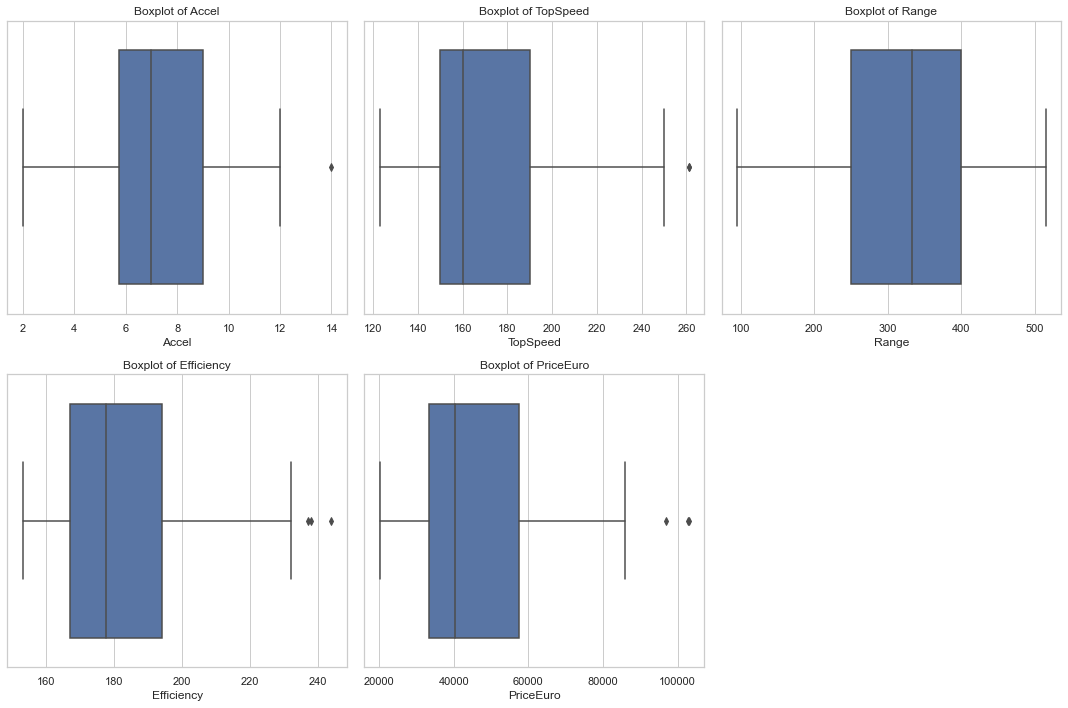

In [38]:
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")
selected_features = ['Accel', 'TopSpeed', 'Range', 'Efficiency', 'PriceEuro']

# Loop through each feature and create a boxplot
for i, feature in enumerate(selected_features):
    plt.subplot(2, 3, i + 1)  
    sns.boxplot(x=segmentation_data[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

In [39]:
#Accel
Q1 = segmentation_data.Accel.quantile(0.25)
Q3 = segmentation_data.Accel.quantile(0.75)
IQR = Q3 - Q1
segmentation_data = segmentation_data[(segmentation_data.Accel >= Q1 - 1.5*IQR) & (segmentation_data.Accel <= Q3 + 1.5*IQR)]

#TopSpeed
Q1 = segmentation_data.TopSpeed.quantile(0.25)
Q3 = segmentation_data.TopSpeed.quantile(0.75)
IQR = Q3 - Q1
segmentation_data = segmentation_data[(segmentation_data.TopSpeed >= Q1 - 1.5*IQR) & (segmentation_data.TopSpeed <= Q3 + 1.5*IQR)]

#Efficiency
Q1 = segmentation_data.Efficiency.quantile(0.25)
Q3 = segmentation_data.Efficiency.quantile(0.75)
IQR = Q3 - Q1
segmentation_data = segmentation_data[(segmentation_data.Efficiency >= Q1 - 1.5*IQR) & (segmentation_data.Efficiency <= Q3 + 1.5*IQR)]

#PriceEuro
Q1 = segmentation_data.PriceEuro.quantile(0.25)
Q3 = segmentation_data.PriceEuro.quantile(0.75)
IQR = Q3 - Q1
segmentation_data = segmentation_data[(segmentation_data.PriceEuro >= Q1 - 1.5*IQR) & (segmentation_data.PriceEuro <= Q3 + 1.5*IQR)]


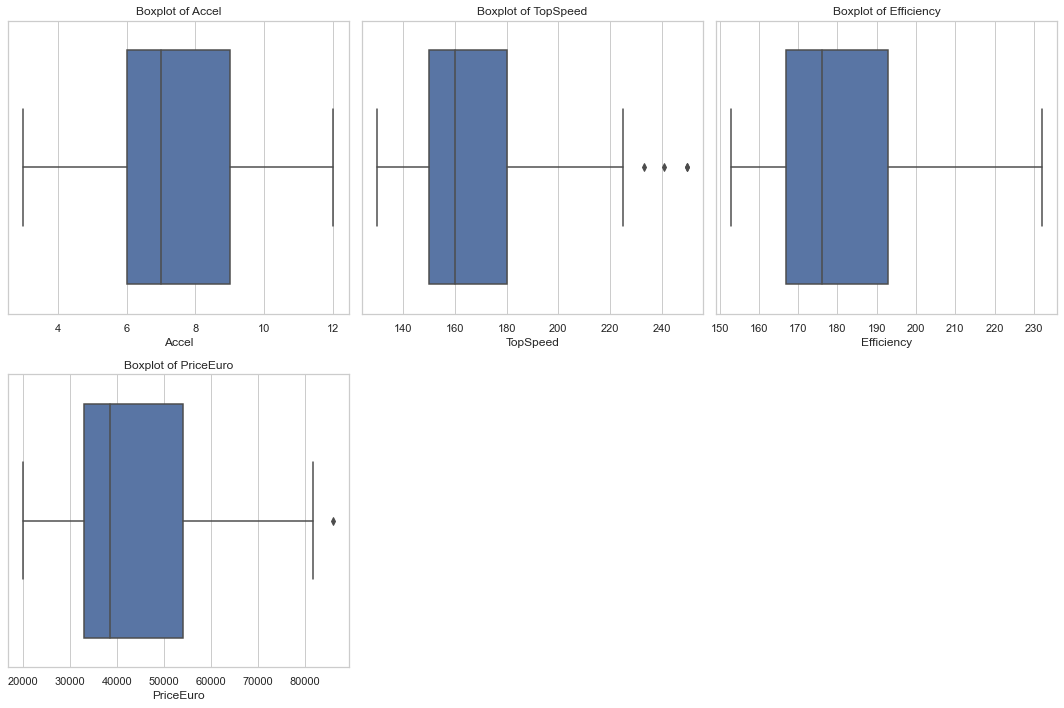

In [40]:
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")
selected_features = ['Accel', 'TopSpeed','Efficiency', 'PriceEuro']

# Loop through each feature and create a boxplot
for i, feature in enumerate(selected_features):
    plt.subplot(2, 3, i + 1)  # Adjust the subplot grid as needed
    sns.boxplot(x=segmentation_data[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

In [41]:
#scaling the features 

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(segmentation_data)
df_scaled

array([[-1.54821759e+00,  2.34785615e+00,  1.46721559e+00,
        -1.02549036e+00,  3.17067438e+00,  2.29415734e-01,
        -1.35246521e+00,  1.12508790e-01,  1.30853512e+00,
         2.42827310e-01,  7.82237864e-01],
       [ 1.19401283e+00, -2.64849627e-01, -4.37057010e-01,
        -7.18035410e-01, -9.09575054e-01,  2.29415734e-01,
         1.28649129e+00,  1.12508790e-01, -1.07061964e+00,
         2.42827310e-01, -8.98373520e-01],
       [-1.54821759e+00,  1.52467488e+00,  9.38250980e-01,
        -6.40531142e-04,  1.27838479e+00,  2.29415734e-01,
        -1.35246521e+00,  1.12508790e-01, -6.74093848e-01,
         2.42827310e-01,  8.45557603e-01],
       [-6.34140784e-01,  4.50960175e-01,  5.15079291e-01,
         1.28042175e+00,  9.23580487e-01,  2.29415734e-01,
         1.28649129e+00,  1.12508790e-01,  9.12009324e-01,
         2.42827310e-01,  1.61067111e+00],
       [ 7.36974425e-01, -8.01706978e-01, -1.49498623e+00,
        -6.66792918e-01, -1.26437935e+00,  2.29415734e-01,
  

In [44]:
segmentation_data.columns

Index(['Accel', 'TopSpeed', 'Range', 'Efficiency', 'FastCharge', 'RapidCharge',
       'PowerTrain', 'PlugType', 'BodyStyle', 'Seats', 'PriceEuro'],
      dtype='object')

In [45]:
df2 = pd.DataFrame(df_scaled, columns = ['Accel', 'TopSpeed', 'Range', 'Efficiency', 'FastCharge', 'RapidCharge','PowerTrain', 'PlugType', 'BodyStyle', 'Seats', 'PriceEuro'] )

In [46]:
df2.head()

,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Seats,PriceEuro
0,-1.548218,2.347856,1.467216,-1.025490,3.170674,0.229416,-1.352465,0.112509,1.308535,0.242827,0.782238
1,1.194013,-0.264850,-0.437057,-0.718035,-0.909575,0.229416,1.286491,0.112509,-1.070620,0.242827,-0.898374
2,-1.548218,1.524675,0.938251,-0.000641,1.278385,0.229416,-1.352465,0.112509,-0.674094,0.242827,0.845558
3,-0.634141,0.450960,0.515079,1.280422,0.923580,0.229416,1.286491,0.112509,0.912009,0.242827,1.610671
4,0.736974,-0.801707,-1.494986,-0.666793,-1.264379,0.229416,1.286491,0.112509,-1.070620,-1.144757,-0.700697


### Market Segmentation using K-means Clustering:

In [47]:
from sklearn.cluster import KMeans

In [48]:
print(df2.isnull().sum())


Accel          0
TopSpeed       0
Range          0
Efficiency     0
FastCharge     4
RapidCharge    0
PowerTrain     0
PlugType       0
BodyStyle      0
Seats          0
PriceEuro      0
dtype: int64


In [49]:
# fill the infinite values with the mean value in the "FastCharge" column
mean_value = df2['FastCharge'].mean()
df2.replace([np.inf, -np.inf], np.nan, inplace=True)
df2['FastCharge'].fillna(mean_value, inplace=True)

In [50]:
print(np.isfinite(df2).all())

Accel          True
TopSpeed       True
Range          True
Efficiency     True
FastCharge     True
RapidCharge    True
PowerTrain     True
PlugType       True
BodyStyle      True
Seats          True
PriceEuro      True
dtype: bool


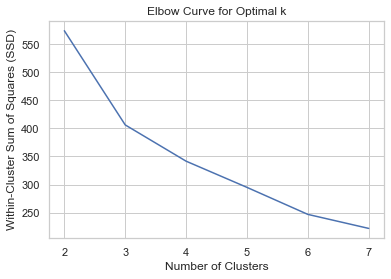

In [51]:
# Elbow curve method to find the ideal number of clusters.
#ssd - Wcss(Within cluster sum of square)
#ssd(Sum of Squared distance)
clusters = list(range(2, 8))
ssd = []

for num_clusters in clusters:
    model_clus = KMeans(n_clusters=num_clusters, max_iter=150, random_state=50)
    model_clus.fit(df2)
    ssd.append(model_clus.inertia_)  # Sum of Squared distance   # SIGNINFICANT CHANGE IN THE PLOT

# Plotting the Elbow curve
plt.plot(clusters, ssd)
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (SSD)')
plt.title('Elbow Curve for Optimal k')
plt.show()


In [52]:
# FROM THE ABOVE GRAPH WE ARE INFERREING THAT OPTIMAL NUMBER OF K = 3 CLUSTERS

In [53]:
cluster = KMeans(n_clusters=3, max_iter=150, random_state= 42)
cluster.fit(df2)   #MODEL BUILDING

KMeans(max_iter=150, n_clusters=3, random_state=42)

In [54]:
# Get cluster labels
cluster_labels = cluster.labels_

In [55]:
cluster_labels

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 2, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 2, 0, 1, 2, 1,
       1, 0, 0, 1, 2, 1, 0, 1, 1, 1, 0, 1, 0, 0])

In [56]:
# Assign the cluster labels to your DataFrame
df2['Cluster'] = cluster_labels

In [57]:
df2

,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Seats,PriceEuro,Cluster
0,-1.548218,2.347856,1.467216,-1.025490,3.170674,0.229416,-1.352465,0.112509,1.308535,0.242827,0.782238,0
1,1.194013,-0.264850,-0.437057,-0.718035,-0.909575,0.229416,1.286491,0.112509,-1.070620,0.242827,-0.898374,1
2,-1.548218,1.524675,0.938251,-0.000641,1.278385,0.229416,-1.352465,0.112509,-0.674094,0.242827,0.845558,0
3,-0.634141,0.450960,0.515079,1.280422,0.923580,0.229416,1.286491,0.112509,0.912009,0.242827,1.610671,0
4,0.736974,-0.801707,-1.494986,-0.666793,-1.264379,0.229416,1.286491,0.112509,-1.070620,-1.144757,-0.700697,1
...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.736974,-0.372221,-0.860229,-0.564308,-1.086977,0.229416,-0.032987,0.112509,0.912009,0.242827,-0.691727,1
76,-0.177102,0.808865,0.144804,2.100302,0.095704,0.229416,1.286491,0.112509,0.912009,0.242827,0.651641,0
77,-0.177102,-0.264850,0.197701,0.511784,0.213972,0.229416,-0.032987,0.112509,-1.070620,0.242827,0.090997,1
78,-1.091179,1.166770,0.144804,0.665512,0.213972,0.229416,-1.352465,0.112509,-1.070620,0.242827,0.420788,0


In [58]:
# Calculating mean for each segment
segment_means = df2.groupby('Cluster').mean()

# Display the calculated segment means
print("Segment Means:")
print(segment_means)


Segment Means:
            Accel  TopSpeed     Range  Efficiency    FastCharge  RapidCharge  \
Cluster                                                                        
0       -0.993242  1.084963  0.824901    0.888783  8.264317e-01     0.229416   
1        0.422761 -0.525076 -0.299306   -0.474634 -4.820852e-01     0.229416   
2        1.879570 -1.293826 -2.182640   -0.525876 -4.455500e-17    -4.358899   

         PowerTrain  PlugType  BodyStyle     Seats  PriceEuro  
Cluster                                                        
0         -0.834099 -0.101794   0.557968  0.540167   1.133971  
1          0.379350  0.300023  -0.228002 -0.104069  -0.549204  
2          1.286491 -2.887726  -1.169751 -2.532342  -1.347350  


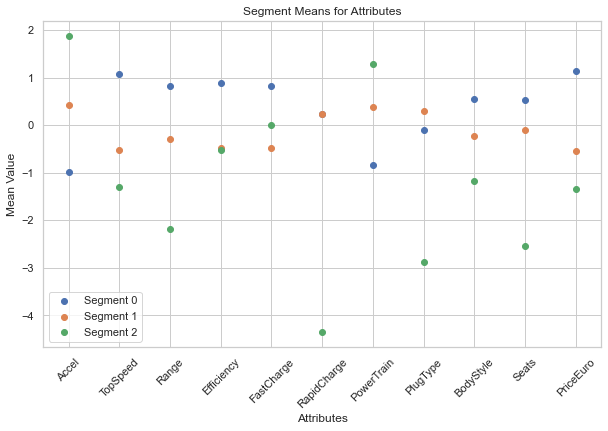

In [59]:
plt.figure(figsize=(10, 6))
for segment in segment_means.index:
    plt.scatter(segment_means.columns, segment_means.loc[segment], label=f'Segment {segment}')

plt.xlabel('Attributes')
plt.ylabel('Mean Value')
plt.title('Segment Means for Attributes')
plt.xticks(rotation = 45)
plt.legend()
plt.show()


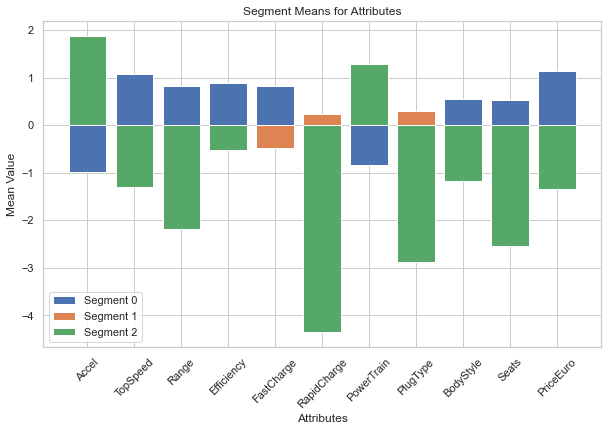

In [60]:
# Plotting
plt.figure(figsize=(10, 6))
for segment in segment_means.index:
    plt.bar(segment_means.columns, segment_means.loc[segment], label=f'Segment {segment}')

plt.xlabel('Attributes')
plt.ylabel('Mean Value')
plt.title('Segment Means for Attributes')
plt.xticks(rotation = 45)
plt.legend()
plt.show()


In [61]:
cluster_means = df2.groupby('Cluster').mean()
print(cluster_means)

            Accel  TopSpeed     Range  Efficiency    FastCharge  RapidCharge  \
Cluster                                                                        
0       -0.993242  1.084963  0.824901    0.888783  8.264317e-01     0.229416   
1        0.422761 -0.525076 -0.299306   -0.474634 -4.820852e-01     0.229416   
2        1.879570 -1.293826 -2.182640   -0.525876 -4.455500e-17    -4.358899   

         PowerTrain  PlugType  BodyStyle     Seats  PriceEuro  
Cluster                                                        
0         -0.834099 -0.101794   0.557968  0.540167   1.133971  
1          0.379350  0.300023  -0.228002 -0.104069  -0.549204  
2          1.286491 -2.887726  -1.169751 -2.532342  -1.347350  


In [62]:
from sklearn.metrics import silhouette_score

In [63]:
# Silhouette score analysis to find the ideal number of clusters for K-means clustering

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state= 100)
    kmeans.fit(df2)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df2, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.3386121518236277
For n_clusters=3, the silhouette score is 0.3897004290985159
For n_clusters=4, the silhouette score is 0.2660399669677683
For n_clusters=5, the silhouette score is 0.2799647586744401
For n_clusters=6, the silhouette score is 0.29595994990013197
For n_clusters=7, the silhouette score is 0.3191816531537433
For n_clusters=8, the silhouette score is 0.33409022257376847


here we have our best k For n_clusters=3, the silhouette score is 0.3897004290985159

The silhouette score is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette score ranges from -1 to 1, with a high value indicating that the object is well matched to its own cluster and poorly matched to neighboring clusters. The ideal silhouette score is close to 1, suggesting well-defined clusters.

In general, the silhouette score can be interpreted as follows:

- **Near +1**: Indicates that the sample is far away from the neighboring clusters.
- **0**: Indicates that the sample is on or very close to the decision boundary between two neighboring clusters.
- **Near -1**: Indicates that those samples might have been assigned to the wrong cluster.

Therefore, a higher silhouette score is generally considered better, and you typically aim for a score as close to 1 as possible. However, the interpretation may vary based on the specific context and characteristics of the data.

In [64]:
df2.head(2)

,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Seats,PriceEuro,Cluster
0,-1.548218,2.347856,1.467216,-1.025490,3.170674,0.229416,-1.352465,0.112509,1.308535,0.242827,0.782238,0
1,1.194013,-0.264850,-0.437057,-0.718035,-0.909575,0.229416,1.286491,0.112509,-1.070620,0.242827,-0.898374,1


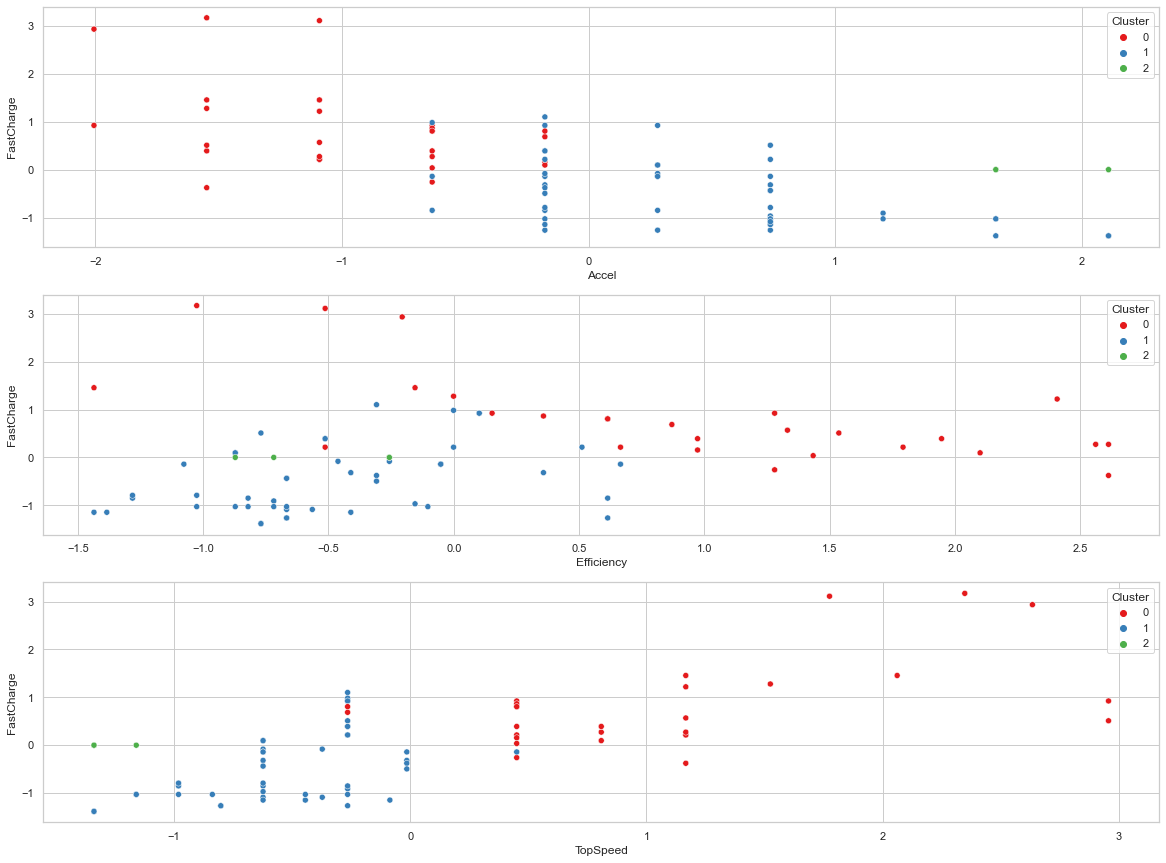

In [65]:
plt.figure(figsize = (20,15))
plt.subplot(3,1,1)
sns.scatterplot(x = 'Accel', y = 'FastCharge',hue='Cluster',data = df2,palette="Set1")
plt.subplot(3,1,2)
sns.scatterplot(x = 'Efficiency', y = 'FastCharge',hue='Cluster', data = df2,palette="Set1")
plt.subplot(3,1,3)
sns.scatterplot(x = 'TopSpeed', y = 'FastCharge',hue='Cluster', data=df2,palette="Set1")
plt.show()

* the above visualization shows the effect of Fastcharging on the  diffrent factors with the help of different colors 